In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm,LinearSegmentedColormap,ListedColormap

In [5]:
%matplotlib inline

In [6]:
def get_axis_limits(ax, scalex=.03,scaley=0.93):
    return ax.get_xlim()[1]*scalex, ax.get_ylim()[1]*scaley

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # https://matplotlib.org/users/colormapnorms.html#custom-normalization-two-linear-ranges
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [7]:
def plotMap(filename):
    cities=pd.read_table(filename,sep=',',na_values=[-9999])
    cities=cities[cities['count']>=10]
    #cities=cities[0<=cities['WDIR850']]
    #cities=cities[cities['WDIR850']<=90]
    # Extract the data we're interested in
    lat = cities['lat_bin'].values
    lon = cities['lon_bin'].values
    ccn = cities['CCN_1.0_cm3'].values
    tcb = cities['Tcb1.0'].values
    #u850,v850=mpcalc.get_wind_components(cities['WSPD850'],cities['WDIR850'])
    lat_max=np.nanmax(lat)
    lon_max=np.nanmax(lon)
    lat_min=np.nanmin(lat)
    lon_min=np.nanmin(lon)
    ccn_max=np.nanmax(ccn)
    print(ccn_max)
    ccn_min=np.nanmin(ccn)
    print(ccn_min)
    tcb_max=np.nanmax(tcb)
    print(tcb_max)
    tcb_min=np.nanmin(tcb)
    print(tcb_min)
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    #proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    #fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([105, 133, 15, 53])
    #axes[i].set_extent([115, 119, 22, 25])
    #axes[i].set_extent([115, 123, 27, 35])#yrd
    #axes[i].set_extent([110,  116, 20, 25])#prd
    #axes[i].set_extent([112, 121, 35, 43])#BTH
    #axes[i].set_extent([115, 119, 22, 26])#HX

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()
    ax.gridlines(ylocs=np.arange(0,90,5),xlocs=np.arange(0,180,5),draw_labels=False,linestyle='--',alpha=0.7)
    #axes[i].xaxis.set_major_formatter(lon_formatter)
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    '''
    if i in range(4,6,1):
        print(axes[i])
        axes[i].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
    
        axes[i].xaxis.set_major_formatter(lon_formatter)
    if i in range(0,6,2):
        print(axes[i])
        axes[i].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
        axes[i].yaxis.set_major_formatter(lat_formatter)
    '''
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.9,linewidths=0.8)
    #newcmap = cmocean.tools.crop_by_percent(cmocean.cm.phase_r, 20, which='both', N=40)
    #bounds = [0, 50, 100, 200, 500,
    #      800, 1000, 1200, 1400,1600]
    #norm = mpl.colors.BoundaryNorm(bounds, newcmap.N)
    #norm = mpl.colors.LogNorm()
    #norm = mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.1, vmin=50, vmax=ccn_max)
    ccn_sca=ax.scatter(lon,lat,#latlon=True,
          c=ccn, s=(2*tcb+10),
          cmap=CM.get_cmap('jet',20),norm=PowerNorm(gamma=0.7),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree())
          #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('jet'),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    #plt.colorbar(label=r'CCN ($cm^{-3}$)')
    #plt.clim(0,1600)
    ccn_sca.set_clim(0,1800)
    #ccn_sca.xformatter = LONGITUDE_FORMATTER
    #ccn_sca.yformatter = LATITUDE_FORMATTER
    #ccn_sca.xlabel_style = {'size': 15, 'color': 'gray'}
    #ccn_sca.xlabel_style = {'color': 'red', 'weight': 'bold'}
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(15*a+20),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temperature',
           bbox_to_anchor=(0,-0.10,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #plt.title("2013-2018 Summer", fontsize=20)
    #X, Y = np.meshgrid(lon, lat)
    #U, V = np.meshgrid(u850, v850)
    #ax.barbs(X, Y, U, V, length=5,
    #         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         linewidth=0.95, transform=ccrs.PlateCarree())
    
    return ccn_sca

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


1693.4285710000001
119.75
25.5
-2.5


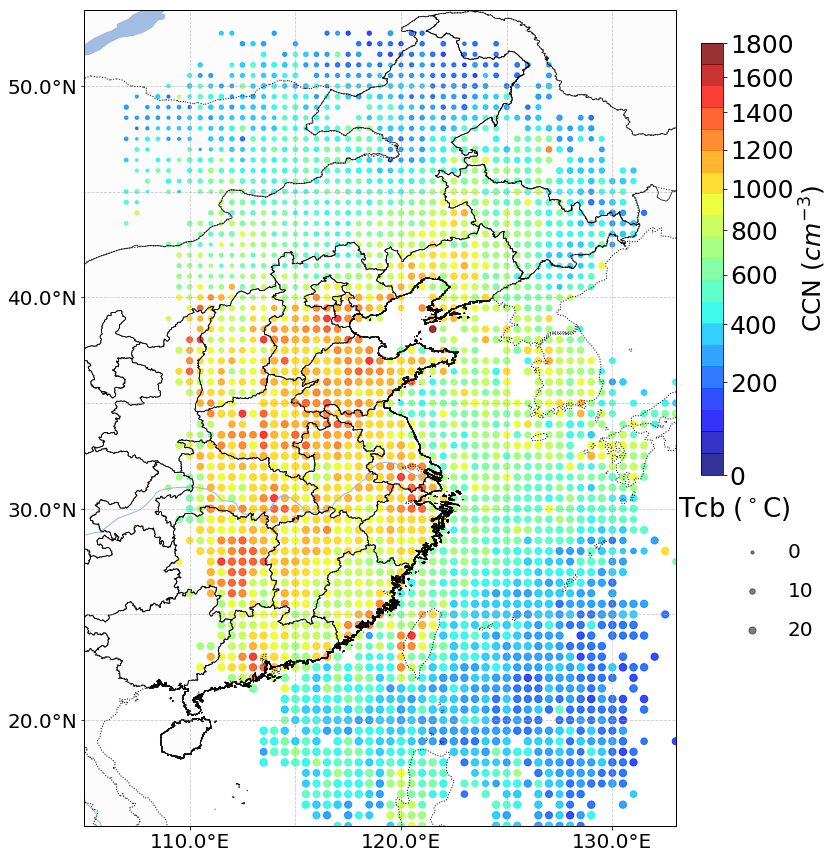

In [21]:
fig = plt.figure(figsize=[15, 15])#比例也决定了间隔的大小
lon_formatter = LongitudeFormatter(number_format='.1f')
                                       #degree_symbol='',
                                       #dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f')
                                      #degree_symbol='')
    
ax= fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#axes[0].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
#axes[0].xaxis.set_major_formatter(lon_formatter)
#axes[0].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
#axes[0].yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([100,110, 120, 130],crs=ccrs.PlateCarree())
ax.set_xticklabels([100,110, 120, 130],fontsize=20)  
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks([20, 30, 40,50], crs=ccrs.PlateCarree())
ax.set_yticklabels([20, 30, 40,50],fontsize=20)
ax.yaxis.set_major_formatter(lat_formatter)
        
filename="1allsum-0.5-NaN-all_0-360_850hpa.csv"
ctt=plotMap(filename)
#axes[i].annotate(NUM[i], xy=get_axis_limits(axes[i]),fontsize=15) 图片会变大
#fig.text(0.5, -0.04, 'Latitude, Longitude', ha='center',fontsize=20)
#fig.text(-0.02, 0.35, 'Height (m)', va='center', rotation='vertical',fontsize=20)
cax = fig.add_axes([0.81, 0.45, 0.02, 0.4])
cbar=plt.colorbar(ctt, cax, orientation='vertical',label=r'CCN ($cm^{-3}$)',extendfrac=1/15,extendrect=True)
#plt.colorbar(label=r'CCN ($cm^{-3}$)')
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r'CCN ($cm^{-3}$)',fontsize=25)
for a in [0,10,20]:
    plt.scatter([], [], c='k', alpha=0.5, s=(2*a+10),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
leg=plt.legend(scatterpoints=1, frameon=False,
       labelspacing=1, loc='lower left',fontsize=20,
       bbox_to_anchor=(1.05,-0.4,1,0.2),
       mode="expand", borderaxespad=0, ncol=1)
leg.set_title('Tcb ($^\circ$C)',prop = {'size': 26, 'family':'sans-serif'})
#plt.savefig("figureYRD-rih.pdf",bbox_inches='tight')
plt.savefig("figureChina-ccn-count2000-one1.png",bbox_inches='tight',dpi=600)

fig.set_facecolor('w')
#plt.tight_layout()和subplots_adjust冲突

In [14]:
def plotMap_h(filename):
    cities=pd.read_table(filename,sep=',',na_values=[-9999])
    cities=cities[cities['count']>=10]
    #cities=cities[0<=cities['WDIR850']]
    #cities=cities[cities['WDIR850']<=90]
    # Extract the data we're interested in
    lat = cities['lat_bin'].values
    lon = cities['lon_bin'].values
    ccn0 = cities['H14_1.0'].values
    tcb = cities['Hcbs1.0'].values
    ccn = ccn0-tcb
    #u850,v850=mpcalc.get_wind_components(cities['WSPD850'],cities['WDIR850'])
    lat_max=np.nanmax(lat)
    lon_max=np.nanmax(lon)
    lat_min=np.nanmin(lat)
    lon_min=np.nanmin(lon)
    ccn_max=np.nanmax(ccn)
    print(ccn_max)
    ccn_min=np.nanmin(ccn)
    print(ccn_min)
    tcb_max=np.nanmax(tcb)
    print(tcb_max)
    tcb_min=np.nanmin(tcb)
    print(tcb_min)
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    #proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    #fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([105, 133, 15, 53])
    #axes[i].set_extent([115, 119, 22, 25])
    #axes[i].set_extent([115, 123, 27, 35])#yrd
    #axes[i].set_extent([110,  116, 20, 25])#prd
    #axes[i].set_extent([112, 121, 35, 43])#BTH
    #axes[i].set_extent([115, 119, 22, 26])#HX

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()
    ax.gridlines(ylocs=np.arange(0,90,5),xlocs=np.arange(0,180,5),draw_labels=False,linestyle='--',alpha=0.7)
    #axes[i].xaxis.set_major_formatter(lon_formatter)
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    '''
    if i in range(4,6,1):
        print(axes[i])
        axes[i].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
    
        axes[i].xaxis.set_major_formatter(lon_formatter)
    if i in range(0,6,2):
        print(axes[i])
        axes[i].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
        axes[i].yaxis.set_major_formatter(lat_formatter)
    '''
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.9,linewidths=0.8)
    #newcmap = cmocean.tools.crop_by_percent(cmocean.cm.phase_r, 20, which='both', N=40)
    #bounds = [0, 50, 100, 200, 500,
    #      800, 1000, 1200, 1400,1600]
    #norm = mpl.colors.BoundaryNorm(bounds, newcmap.N)
    #norm = mpl.colors.LogNorm()
    #norm = mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.1, vmin=50, vmax=ccn_max)
    terrain = CM.get_cmap('terrain', 40)
    newcolors = terrain(np.linspace(0, 0.75, 20))
    newcmap = ListedColormap(newcolors)
    ccn_sca=ax.scatter(lon,lat,#latlon=True,
          c=ccn, s=(tcb/50),
          cmap=newcmap,norm=PowerNorm(gamma=0.7),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree())
          #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('jet'),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    #plt.colorbar(label=r'CCN ($cm^{-3}$)')
    #plt.clim(0,1600)
    ccn_sca.set_clim(500,7000)
    #ccn_sca.xformatter = LONGITUDE_FORMATTER
    #ccn_sca.yformatter = LATITUDE_FORMATTER
    #ccn_sca.xlabel_style = {'size': 15, 'color': 'gray'}
    #ccn_sca.xlabel_style = {'color': 'red', 'weight': 'bold'}
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(15*a+20),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temperature',
           bbox_to_anchor=(0,-0.10,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #plt.title("2013-2018 Summer", fontsize=20)
    #X, Y = np.meshgrid(lon, lat)
    #U, V = np.meshgrid(u850, v850)
    #ax.barbs(X, Y, U, V, length=5,
    #         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         linewidth=0.95, transform=ccrs.PlateCarree())
    
    return ccn_sca

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


7013.0833330000005
343.16666670000006
2843.615385
490.46153849999996


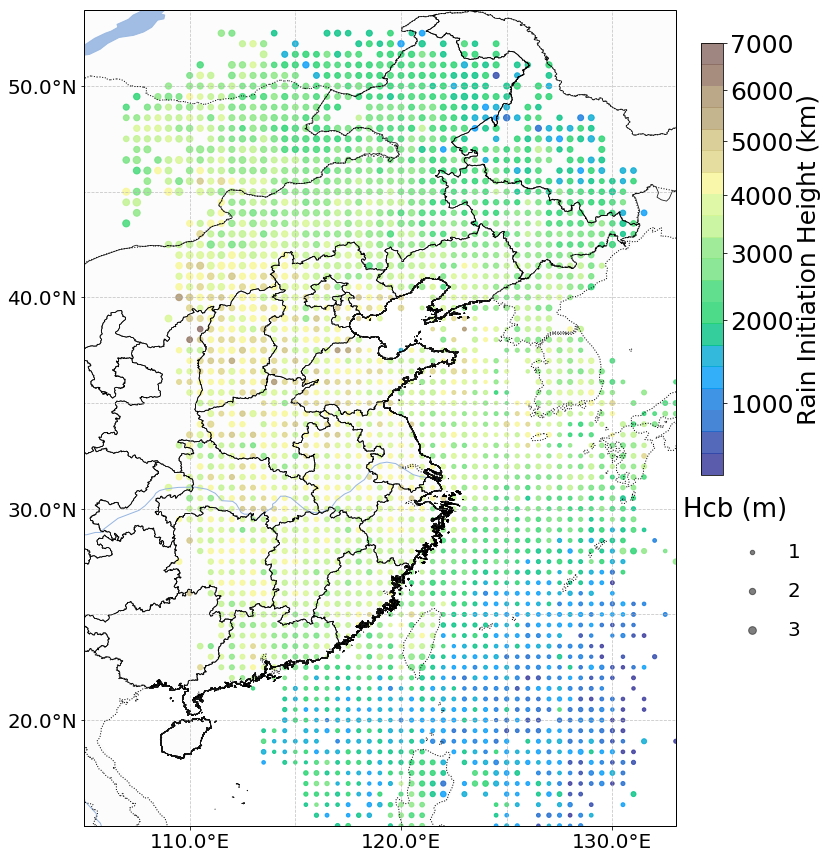

In [19]:
fig = plt.figure(figsize=[15, 15])#比例也决定了间隔的大小
lon_formatter = LongitudeFormatter(number_format='.1f')
                                       #degree_symbol='',
                                       #dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f')
                                      #degree_symbol='')
    
ax= fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#axes[0].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
#axes[0].xaxis.set_major_formatter(lon_formatter)
#axes[0].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
#axes[0].yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([100,110, 120, 130],crs=ccrs.PlateCarree())
ax.set_xticklabels([100,110, 120, 130],fontsize=20)  
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks([20, 30, 40,50], crs=ccrs.PlateCarree())
ax.set_yticklabels([20, 30, 40,50],fontsize=20)
ax.yaxis.set_major_formatter(lat_formatter)
        
filename="1allsum-0.5-NaN-all_0-360_850hpa.csv"
ctt=plotMap_h(filename)
#axes[i].annotate(NUM[i], xy=get_axis_limits(axes[i]),fontsize=15) 图片会变大
#fig.text(0.5, -0.04, 'Latitude, Longitude', ha='center',fontsize=20)
#fig.text(-0.02, 0.35, 'Height (m)', va='center', rotation='vertical',fontsize=20)
cax = fig.add_axes([0.81, 0.45, 0.02, 0.4])
cbar=plt.colorbar(ctt, cax, orientation='vertical',label=r'Rain Initiation Height (km)',extendfrac=1/15,extendrect=True)
#plt.colorbar(label=r'CCN ($cm^{-3}$)')
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r'Rain Initiation Height (km)',fontsize=25)
for a in [1,2,3]:
    plt.scatter([], [], c='k', alpha=0.5, s=a*1000/50,
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
leg=plt.legend(scatterpoints=1, frameon=False,
       labelspacing=1, loc='lower left',fontsize=20,
       bbox_to_anchor=(1.05,-0.4,1,0.2),
       mode="expand", borderaxespad=0, ncol=1)
leg.set_title('Hcb (m)',prop = {'size': 26, 'family':'sans-serif'})
#plt.savefig("figureYRD-rih.pdf",bbox_inches='tight')
plt.savefig("figureChina-rih-count2000-one1.png",bbox_inches='tight',dpi=600)

fig.set_facecolor('w')
#plt.tight_layout()和subplots_adjust冲突

[Why the annotate worked unexpected here in cartopy?](https://stackoverflow.com/questions/25416600/why-the-annotate-worked-unexpected-here-in-cartopy)

In [1]:
import xarray as xr

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [18]:
def plotMap_light(filename):
    cities=pd.read_table(filename,sep=',',na_values=[-9999])
    cities=cities[cities['count']>=10]
    #cities=cities[0<=cities['WDIR850']]
    #cities=cities[cities['WDIR850']<=90]
    # Extract the data we're interested in
    lat = cities['lat_bin'].values
    lon = cities['lon_bin'].values
    ccn = cities['CCN_1.0_cm3'].values
    tcb = cities['Tcb1.0'].values
    #u850,v850=mpcalc.get_wind_components(cities['WSPD850'],cities['WDIR850'])
    lat_max=np.nanmax(lat)
    lon_max=np.nanmax(lon)
    lat_min=np.nanmin(lat)
    lon_min=np.nanmin(lon)
    ccn_max=np.nanmax(ccn)
    print(ccn_max)
    ccn_min=np.nanmin(ccn)
    print(ccn_min)
    tcb_max=np.nanmax(tcb)
    print(tcb_max)
    tcb_min=np.nanmin(tcb)
    print(tcb_min)
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    #proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    #fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([105, 133, 15, 53])
    #axes[i].set_extent([115, 119, 22, 25])
    #axes[i].set_extent([115, 123, 27, 35])#yrd
    #axes[i].set_extent([110,  116, 20, 25])#prd
    #axes[i].set_extent([112, 121, 35, 43])#BTH
    #axes[i].set_extent([115, 119, 22, 26])#HX

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()
    ax.gridlines(ylocs=np.arange(0,90,5),xlocs=np.arange(0,180,5),draw_labels=False,linestyle='--',alpha=0.7)
    #axes[i].xaxis.set_major_formatter(lon_formatter)
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    '''
    if i in range(4,6,1):
        print(axes[i])
        axes[i].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
    
        axes[i].xaxis.set_major_formatter(lon_formatter)
    if i in range(0,6,2):
        print(axes[i])
        axes[i].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
        axes[i].yaxis.set_major_formatter(lat_formatter)
    '''
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = 'D:\data\map\CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.9,linewidths=0.8)
    #newcmap = cmocean.tools.crop_by_percent(cmocean.cm.phase_r, 20, which='both', N=40)
    #bounds = [0, 50, 100, 200, 500,
    #      800, 1000, 1200, 1400,1600]
    #norm = mpl.colors.BoundaryNorm(bounds, newcmap.N)
    #norm = mpl.colors.LogNorm()
    #norm = mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.1, vmin=50, vmax=ccn_max)
    ccn_sca=ax.scatter(lon,lat,#latlon=True,
          c=ccn, s=(3*tcb+10),
          cmap=CM.get_cmap('jet',20),norm=PowerNorm(gamma=0.7),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('rainbow',40),norm=LogNorm(vmin=max(ccn.min(),0.1),clip=True),alpha=0.5,transform=ccrs.PlateCarree())
          #Normalize a given value to the 0-1 range on a log scale
          #cmap=CM.get_cmap('jet'),alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    #plt.colorbar(label=r'CCN ($cm^{-3}$)')
    #plt.clim(0,1600)
    ccn_sca.set_clim(0,1800)
    #ccn_sca.xformatter = LONGITUDE_FORMATTER
    #ccn_sca.yformatter = LATITUDE_FORMATTER
    #ccn_sca.xlabel_style = {'size': 15, 'color': 'gray'}
    #ccn_sca.xlabel_style = {'color': 'red', 'weight': 'bold'}
# make legend with dummy points
    '''
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(15*a+20),
                label=str(a)+'')
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left',title= 'AQI',
#           bbox_to_anchor=(,0),ncol=5)
    plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',title= 'Tb-temperature',
           bbox_to_anchor=(0,-0.10,1,0.2),
           mode="expand", borderaxespad=0, ncol=6)
    '''
    #plt.title("2013-2018 Summer", fontsize=20)
    #X, Y = np.meshgrid(lon, lat)
    #U, V = np.meshgrid(u850, v850)
    #ax.barbs(X, Y, U, V, length=5,
    #         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
    #         linewidth=0.95, transform=ccrs.PlateCarree())
    cc = ax.scatter(lonl[::30], latl[::30],s=1,marker=',',color='black',alpha=0.2,transform=ccrs.PlateCarree())
    cax = fig.add_axes([0.81, 0.45, 0.02, 0.4])
    cbar=plt.colorbar(ccn_sca, cax, orientation='vertical',label=r'CCN ($cm^{-3}$)',extendfrac=1/15,extendrect=True)
    #plt.colorbar(label=r'CCN ($cm^{-3}$)')
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(r'CCN ($cm^{-3}$)',fontsize=25)
    for a in [0,10,20]:
        plt.scatter([], [], c='k', alpha=0.5, s=(3*a+10),
                    label=str(a)+'')
    #plt.legend(scatterpoints=1, frameon=False,
    #           labelspacing=1, loc='lower left',title= 'AQI',
    #           bbox_to_anchor=(,0),ncol=5)
    leg=plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left',fontsize=20,
           bbox_to_anchor=(1.05,-0.4,1,0.2),
            borderaxespad=0, ncol=1)
    leg.set_title('Tcb ($^\circ$C)',prop = {'size': 26, 'family':'sans-serif'})
    return fig,ax

In [8]:
ds= xr.open_dataset("D:/data/lights/light.nc")
light=ds.value
lat1 = ds.lat
lon1 = ds.lon
lons, lats = np.meshgrid(lon1, lat1)
lonl=lons[light>50]
latl=lats[light>50]

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


1693.4285710000001
119.75
25.5
-2.5


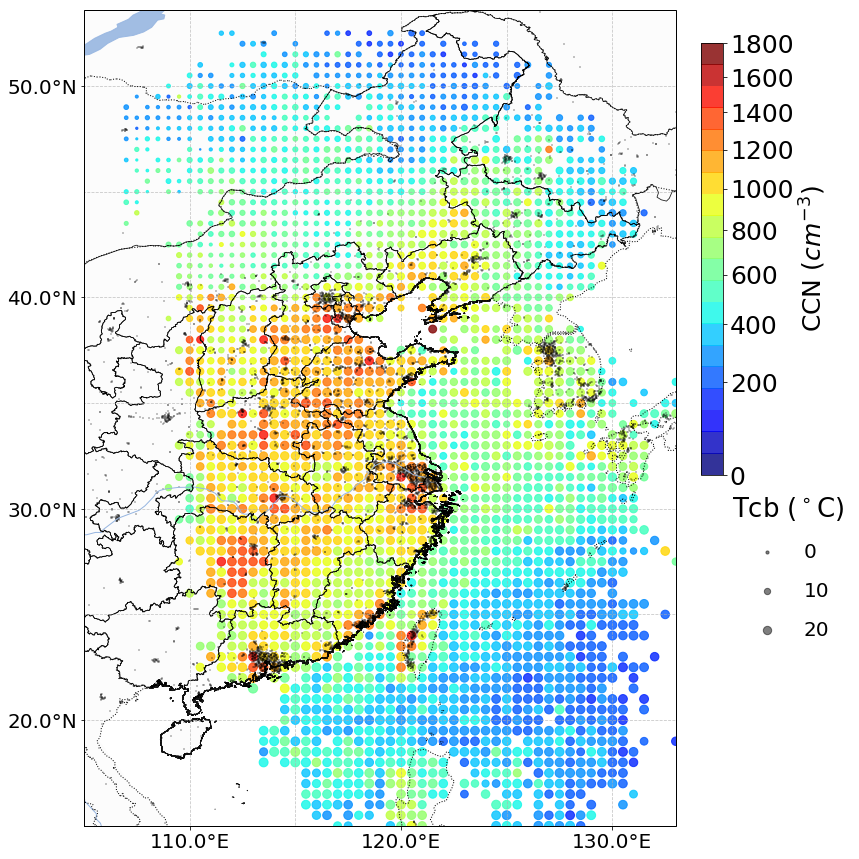

In [19]:
fig = plt.figure(figsize=[15, 15])#比例也决定了间隔的大小
lon_formatter = LongitudeFormatter(number_format='.1f')
                                       #degree_symbol='',
                                       #dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f')
                                      #degree_symbol='')
    
ax= fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
#axes[0].set_xticks([110, 112, 114, 116, 118, 120], crs=ccrs.PlateCarree())
#axes[0].xaxis.set_major_formatter(lon_formatter)
#axes[0].set_yticks([22, 23, 24, 25], crs=ccrs.PlateCarree())
#axes[0].yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([100,110, 120, 130],crs=ccrs.PlateCarree())
ax.set_xticklabels([100,110, 120, 130],fontsize=20)  
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks([20, 30, 40,50], crs=ccrs.PlateCarree())
ax.set_yticklabels([20, 30, 40,50],fontsize=20)
ax.yaxis.set_major_formatter(lat_formatter)
        
filename="1allsum-0.5-NaN-all_0-360_850hpa.csv"
plotMap_light(filename)
plt.savefig("figureChina-ccn-count2000-light0.2.png",bbox_inches='tight',dpi=600)
fig.set_facecolor('w')
#plt.tight_layout()和subplots_adjust冲突